In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *

#My image
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
file_path = '../Dropbox Files/hel1.pma'
avg_frame_data = avg_frame_arr(file_path)

#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

#Chanel image paths
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

#Chanel images
image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

Image Size: 512 x 512
Sucessfully generated average frame


Number of peaks identified in CH1: 51
Number of peaks identified in CH2: 66


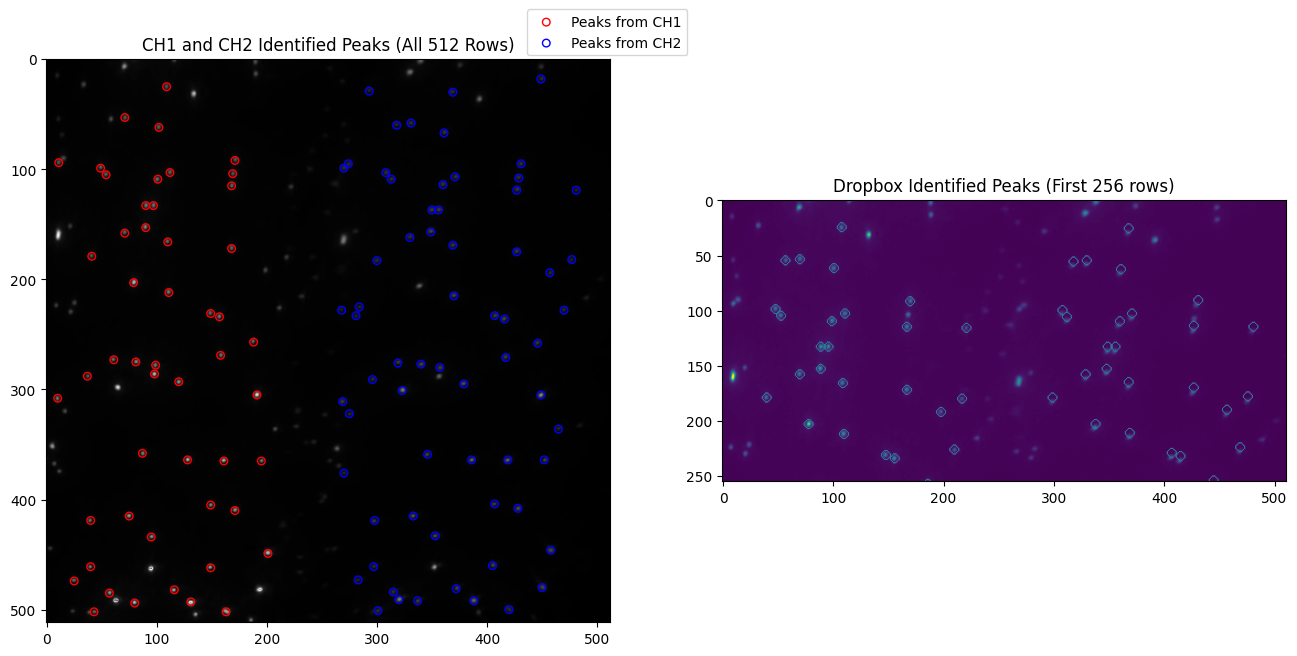

In [2]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
scat1= axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
scat2= axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()

# PolyMap

# Using peaks from manually found pairs (degree =2, similar to IDL)
#### CH1_Peak39 (y, x):(62,106), CH2_Peak36 (y, x):(67,365)
#### CH1_Peak55 (y, x):(192,203), CH2_Peak57 (y, x):(194,461)
#### CH1_Peak24 (y, x):(461,44), CH2_Peak51 (y, x):(461,301)

X-Mapping Parameters: [-2.67719138e-04  1.07241594e+00  2.54332003e+02]
Y-Mapping Parameters: [3.92029545e-05 9.66965526e-01 6.89744120e+00]


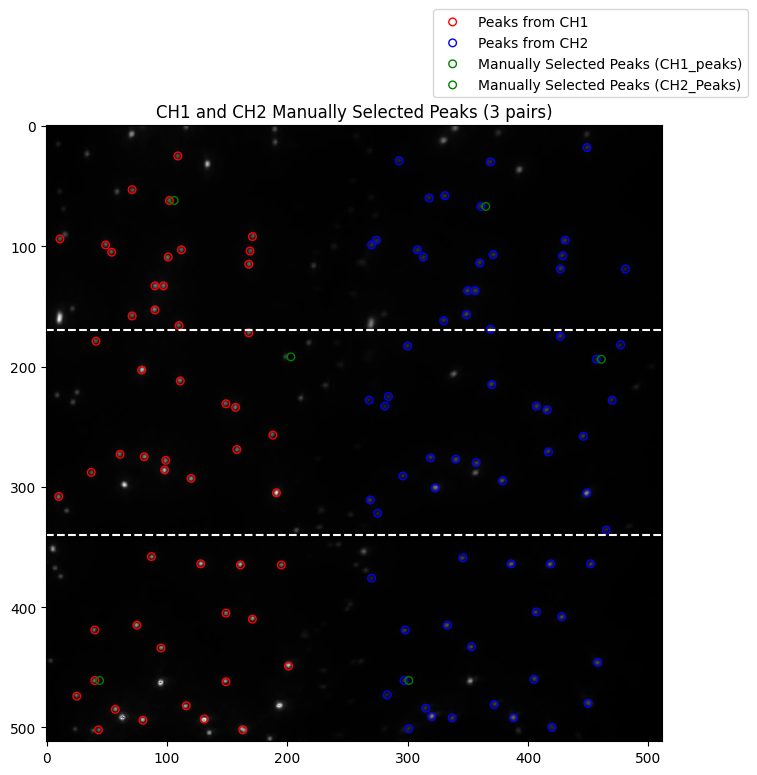

In [3]:
CH1_peaks_3 = np.array([[62, 106], [192, 203], [461, 44]])
CH2_peaks_3 = np.array([[67, 365], [194, 461], [461, 301]])

params_x_man_3, params_y_man_3 = find_polyfit_params(CH1_peaks_3, CH2_peaks_3, degree=2)

print("X-Mapping Parameters:", params_x_man_3)
print("Y-Mapping Parameters:", params_y_man_3)

plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (3 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 170, color='w', linestyle='--')  
plt.axhline(y= 340, color='w', linestyle='--')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_3[:, 1], CH1_peaks_3[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_3[:, 1], CH2_peaks_3[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [4]:
# apply mapping function to all CH1 peaks
# if the CH1 peak does not map to CH2 with 1 pixel then we discard it from CH1
# if CH2 peaks are not mapped onto then discard the peak
mapped_peaks_3 = apply_polyfit_params(good_peaks_1, params_x_man_3, params_y_man_3).astype(np.uint16)
print(f"Number of mapped peaks: {len(mapped_peaks_3)}")

Number of mapped peaks: 51


In [5]:
poly_pair_count_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1)[0]
poly_pair_arr_CH1_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1)[1]
poly_pair_arr_CH2_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1)[2]

poly_pair_count_tol2_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=2)[0]
poly_pair_arr_CH1_tol2_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=2)[1]
poly_pair_arr_CH2_tol2_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=2)[2]

poly_pair_count_tol3_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=3)[0]
poly_pair_arr_CH1_tol3_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=3)[1]
poly_pair_arr_CH2_tol3_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=3)[2]

poly_pair_count_tol4_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=4)[0]
poly_pair_arr_CH1_tol4_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=4)[1]
poly_pair_arr_CH2_tol4_3 = find_polyfit_pairs(mapped_peaks_3, good_peaks_1, tolerance=4)[2]

print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_3}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_3}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_3}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_3}")

Number of Polynomial pairs (tolerance=1): 8
Number of Polynomial pairs (tolerance=2): 25
Number of Polynomial pairs (tolerance=3): 45
Number of Polynomial pairs (tolerance=4): 49


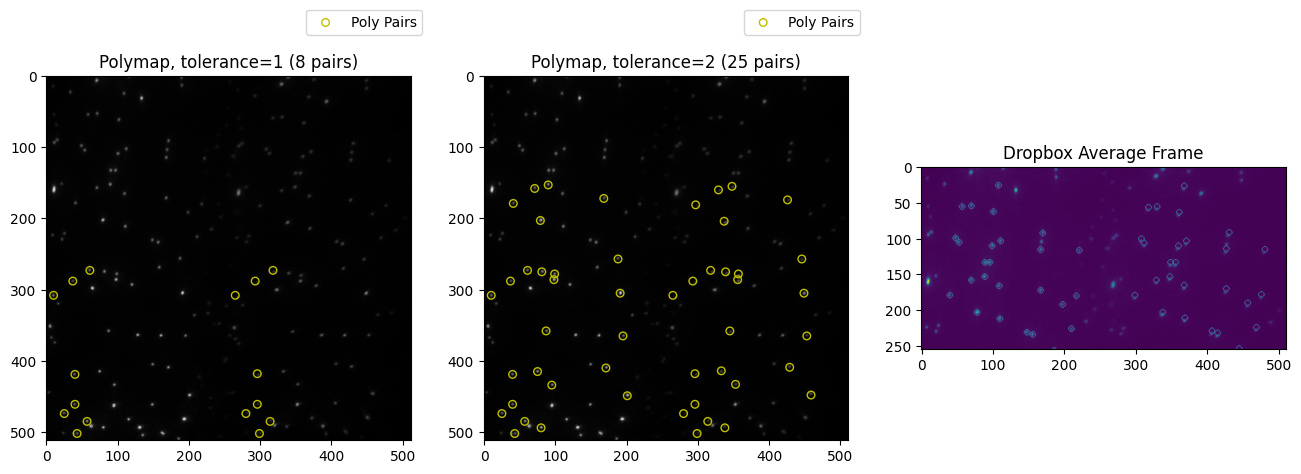

In [6]:
#Nb. edit to display the poly pairs in yellow
fig, axes = plt.subplots(1, 3, figsize=(16, 48))

axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=1 ({poly_pair_count_3} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_3[:, 1], poly_pair_arr_CH1_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_3[:, 1], poly_pair_arr_CH2_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))  

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=2 ({poly_pair_count_tol2_3} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol2_3[:, 1], poly_pair_arr_CH1_tol2_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol2_3[:, 1], poly_pair_arr_CH2_tol2_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    
    
axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()


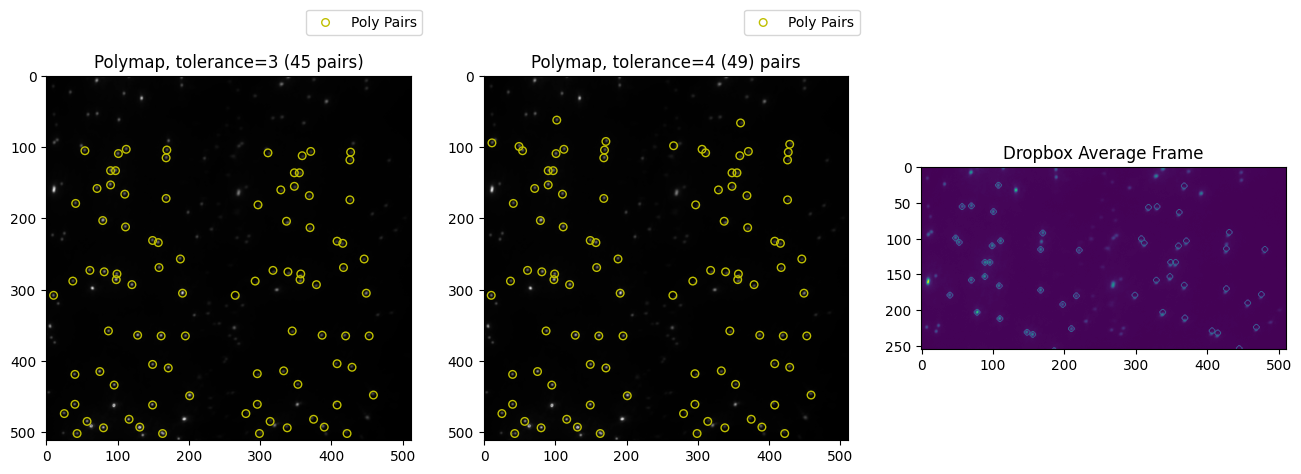

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_3} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_3[:, 1], poly_pair_arr_CH1_tol3_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_3[:, 1], poly_pair_arr_CH2_tol3_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_3}) pairs")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_3[:, 1], poly_pair_arr_CH1_tol4_3[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_3[:, 1], poly_pair_arr_CH2_tol4_3[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()

In [8]:
print(f"Length of CH1 tolerance=4 (3pair): {len(poly_pair_arr_CH1_tol4_3)}")
print(f"Length of CH2 tolerance=4 (3pair): {len(poly_pair_arr_CH2_tol4_3)}")

Length of CH1 tolerance=4 (3pair): 49
Length of CH2 tolerance=4 (3pair): 49


# Continued by manually selecting 5 pairs
##### CH1_Peak45 (y, x):(25,113), CH2_Peak43 (y, x):(30,373)
##### CH1_Peak35 (y, x):(115,172), CH2_Peak35 (y, x):(119,431)
##### CH1_Peak33 (y, x):(231,153), CH2_Peak28 (y, x):(233,411)
##### CH1_Peak19 (y, x):(358,91), CH2_Peak17 (y, x):(359,350)
##### CH1_Peak3 (y, x):(449,205), CH2_Peak11 (y, x):(446,462)

In [9]:
CH1_peaks_5 = np.array([[25, 113], [115, 172], [231, 153], [358, 91], [449, 205]])
CH2_peaks_5 = np.array([[30, 373], [119, 431], [233, 411], [359, 350], [446, 462]])

params_x_man_5, params_y_man_5 = find_polyfit_params(CH1_peaks_5, CH2_peaks_5, degree=3)
mapped_peaks_experiment_5 = apply_polyfit_params(CH1_peaks_5, params_x_man_5, params_y_man_5).astype(np.uint16)

print("X-Mapping Parameters:", params_x_man_5)
print("Y-Mapping Parameters:", params_y_man_5)

# print(f"Mapped CH2 peak coordinates: \n{mapped_peaks_experiment_5}")
# print(f"Actual CH2 peak coordinates: \n{CH2_peaks_5}")   
# print(f"CH1 peak coordinates: \n{CH1_peaks_5}")

X-Mapping Parameters: [ 2.88748440e-06 -1.55686759e-03  1.24370519e+00  2.47714006e+02]
Y-Mapping Parameters: [-2.21569422e-07  1.26848798e-04  9.68276731e-01  5.86161804e+00]


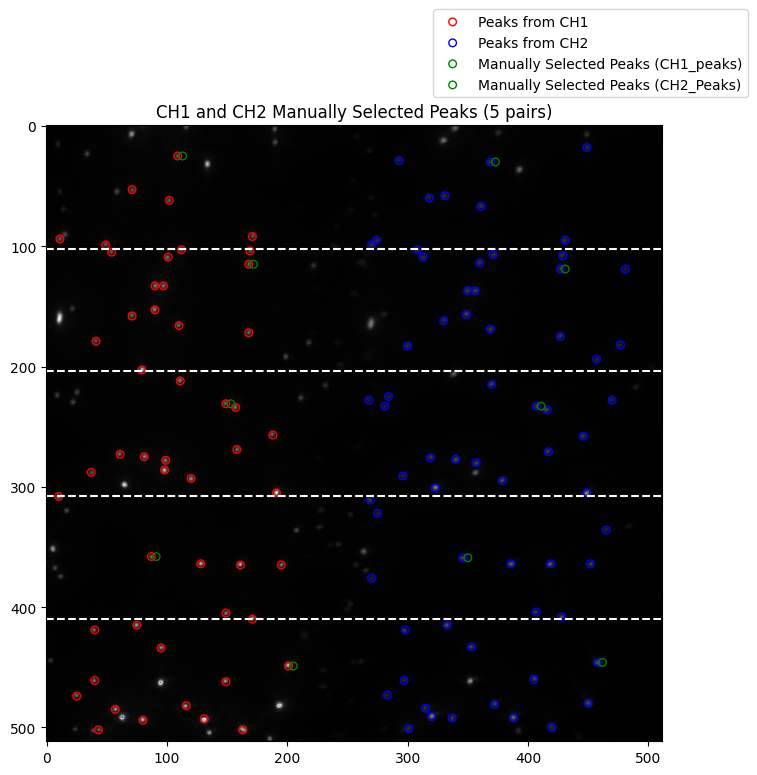

In [10]:
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (5 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_5[:, 1], CH1_peaks_5[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_5[:, 1], CH2_peaks_5[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [11]:
mapped_peaks_5 = apply_polyfit_params(good_peaks_1, params_x_man_5, params_y_man_5).astype(np.uint16)
poly_pair_count_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1)[0]
poly_pair_arr_CH1_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1)[1]
poly_pair_arr_CH2_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1)[2]

poly_pair_count_tol2_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=2)[0]
poly_pair_arr_CH1_tol2_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=2)[1]
poly_pair_arr_CH2_tol2_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=2)[2]

poly_pair_count_tol3_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=3)[0]
poly_pair_arr_CH1_tol3_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=3)[1]
poly_pair_arr_CH2_tol3_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=3)[2]

poly_pair_count_tol4_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=4)[0]
poly_pair_arr_CH1_tol4_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=4)[1]
poly_pair_arr_CH2_tol4_5 = find_polyfit_pairs(mapped_peaks_5, good_peaks_1, tolerance=4)[2]

print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_5}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_5}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_5}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_5}")

Number of Polynomial pairs (tolerance=1): 2
Number of Polynomial pairs (tolerance=2): 14
Number of Polynomial pairs (tolerance=3): 37
Number of Polynomial pairs (tolerance=4): 40


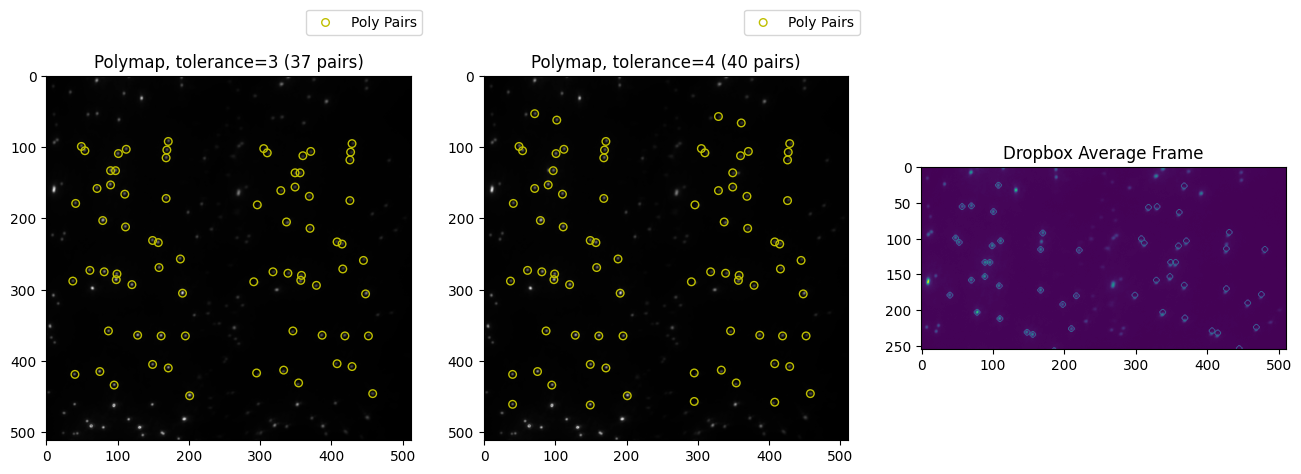

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_5} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_5[:, 1], poly_pair_arr_CH1_tol3_5[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_5[:, 1], poly_pair_arr_CH2_tol3_5[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_5} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_5[:, 1], poly_pair_arr_CH1_tol4_5[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_5[:, 1], poly_pair_arr_CH2_tol4_5[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()

In [13]:
##### Still issue of close peaks being doubly mapped in CH2 for tolerance = 4 (see 100, 150). 
print(f"Length of CH1 tolerance=4 (5pair): {len(poly_pair_arr_CH1_tol4_5)}")
print(f"Length of CH2 tolerance=4 (5pair): {len(poly_pair_arr_CH2_tol4_5)}")

Length of CH1 tolerance=4 (5pair): 40
Length of CH2 tolerance=4 (5pair): 40


# Proceed with tolerance = 3, manually selecting 6 peak pairs

##### CH1_Peak47 (y, x):(53,75), CH2_Peak45 (y, x):(58,335)
##### CH1_Peak50 (y, x):(14,194), CH2_Peak50 (y, x):(18,453)
##### CH1_Peak44 (y, x):(179,45), CH2_Peak47 (y, x):(183,304)
##### CH1_Peak55 (y, x):(192,203), CH2_Peak57 (y, x):(194,461)
##### CH1_Peak52 (y, x):(368,11), CH2_Peak58 (y, x):(370,269)
##### CH1_Peak3 (y, x):(449,205), CH2_Peak11 (y, x):(446,462)

In [14]:
CH1_peaks_6 = np.array([[53,75], [14, 194], [179, 45], [192, 203], [368, 11], [449, 205]])
CH2_peaks_6 = np.array([[58, 335], [18, 453], [183, 304], [194, 461], [370, 269], [446, 462]])

params_x_man_6, params_y_man_6 = find_polyfit_params(CH1_peaks_6, CH2_peaks_6, degree=3)
mapped_peaks_experiment_6 = apply_polyfit_params(CH1_peaks_6, params_x_man_6, params_y_man_6).astype(np.uint16)

print("X-Mapping Parameters:", params_x_man_6)
print("Y-Mapping Parameters:", params_y_man_6)

# print(f"Mapped CH2 peak coordinates: \n{mapped_peaks_experiment_6}")
# print(f"Actual CH2 peak coordinates: \n{CH2_peaks_6}")   
# print(f"CH1 peak coordinates: \n{CH1_peaks_6}")

X-Mapping Parameters: [-4.02974601e-06  8.92919399e-04  9.82459422e-01  2.58152310e+02]
Y-Mapping Parameters: [-3.46492203e-07  1.89735172e-04  9.67050587e-01  5.14770855e+00]


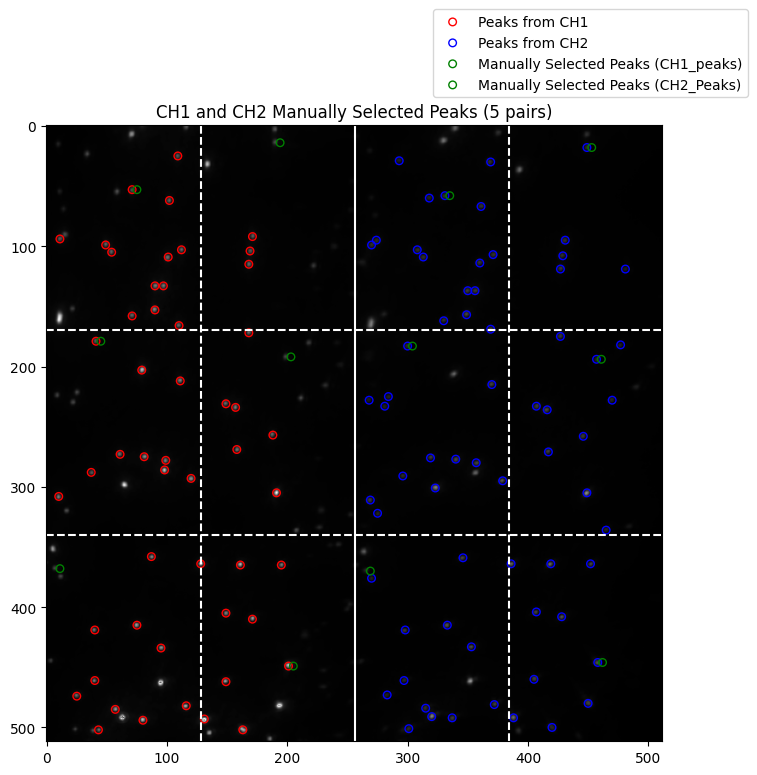

In [15]:
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (5 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 170, color='w', linestyle='--')  
plt.axhline(y= 340, color='w', linestyle='--')
plt.axvline(x= 128, color='w', linestyle='--')
plt.axvline(x= 384, color='w', linestyle='--')
plt.axvline(x= 256, color='w', linestyle='-')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_6[:, 1], CH1_peaks_6[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_6[:, 1], CH2_peaks_6[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [16]:
mapped_peaks_6 = apply_polyfit_params(good_peaks_1, params_x_man_6, params_y_man_6).astype(np.uint16)
poly_pair_count_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1)[0]
poly_pair_arr_CH1_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1)[1]
poly_pair_arr_CH2_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1)[2]

poly_pair_count_tol2_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=2)[0]
poly_pair_arr_CH1_tol2_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=2)[1]
poly_pair_arr_CH2_tol2_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=2)[2]

poly_pair_count_tol3_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=3)[0]
poly_pair_arr_CH1_tol3_6= find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=3)[1]
poly_pair_arr_CH2_tol3_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=3)[2]

poly_pair_count_tol4_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=4)[0]
poly_pair_arr_CH1_tol4_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=4)[1]
poly_pair_arr_CH2_tol4_6 = find_polyfit_pairs(mapped_peaks_6, good_peaks_1, tolerance=4)[2]

print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_6}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_6}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_6}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_6}")

Number of Polynomial pairs (tolerance=1): 0
Number of Polynomial pairs (tolerance=2): 4
Number of Polynomial pairs (tolerance=3): 16
Number of Polynomial pairs (tolerance=4): 22


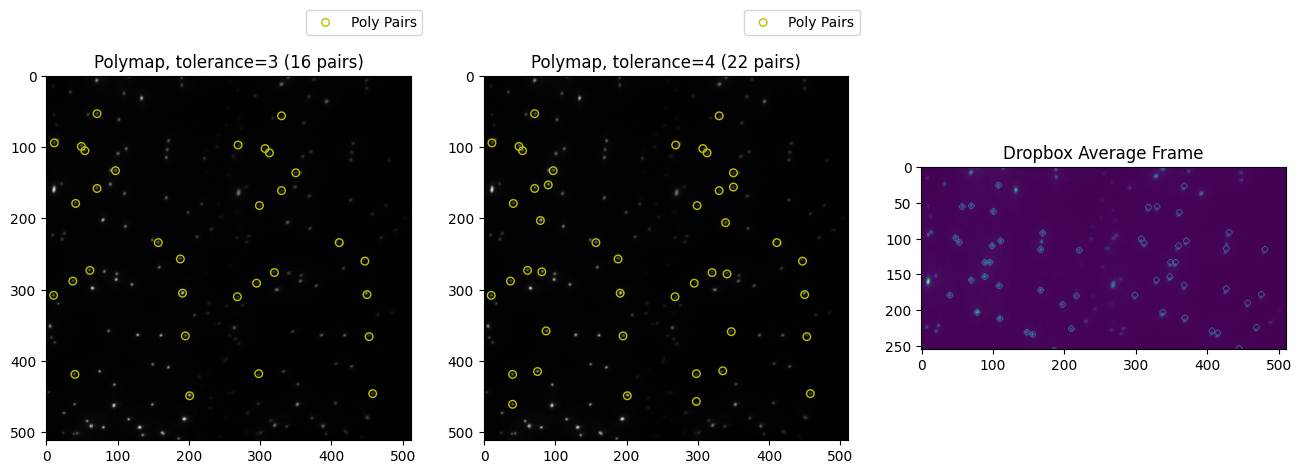

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_6} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_6[:, 1], poly_pair_arr_CH1_tol3_6[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_6[:, 1], poly_pair_arr_CH2_tol3_6[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))    

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_6} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_6[:, 1], poly_pair_arr_CH1_tol4_6[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_6[:, 1], poly_pair_arr_CH2_tol4_6[:, 0], s=30, facecolors='none', edgecolors='y')   
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()

In [18]:
#### The 6 pair mapping does worse !! A lot of peaks are being missed!!
print(f"Length of CH1 tolerance=4 (6pair): {len(poly_pair_arr_CH1_tol4_6)}")
print(f"Length of CH2 tolerance=4 (6pair): {len(poly_pair_arr_CH2_tol4_6)}")

Length of CH1 tolerance=4 (6pair): 22
Length of CH2 tolerance=4 (6pair): 22


# Selecting 10 pairs
#### CH1_Peak53 (y, x):(55,63), CH2_Peak56 (y, x):(60,322)
#### CH1_Peak50 (y, x):(14,194), CH2_Peak50 (y, x):(18,453)
#### CH1_Peak44 (y, x):(179,45), CH2_Peak47 (y, x):(183,304)
#### CH1_Peak35 (y, x):(115,172), CH2_Peak35 (y, x):(119,431)
#### CH1_Peak29 (y, x):(273,65), CH2_Peak33 (y, x):(276,323)
#### CH1_Peak40 (y, x):(257,192), CH2_Peak29 (y, x):(258,450)
#### CH1_Peak19 (y, x):(358,91), CH2_Peak17 (y, x):(359,350)
#### CH1_Peak22 (y, x):(365,199), CH2_Peak19 (y, x):(364,456)
#### CH1_Peak27 (y, x):(419,44), CH2_Peak32 (y, x):(420,301)
#### CH1_Peak3 (y, x):(449,205), CH2_Peak11 (y, x):(446,462)

In [19]:
CH1_peaks_10 = np.array([[55,63], [14, 194], [179, 45], [115, 172], [273, 65], [257, 192], [358, 91], [365, 199], [419, 44], [445, 205]])
CH2_peaks_10 = np.array([[60, 322], [18, 453], [183, 304], [119, 431], [276, 323], [258, 450], [359, 350], [364, 456], [420, 301], [446, 462]])

params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)


print("X-Mapping Parameters:", params_x_man_10)
print("Y-Mapping Parameters:", params_y_man_10)

X-Mapping Parameters: [-2.53605369e-06  6.11855853e-04  9.76124999e-01  2.58108366e+02]
Y-Mapping Parameters: [ 3.27648100e-07 -2.26245078e-04  1.02989737e+00  3.66879500e+00]


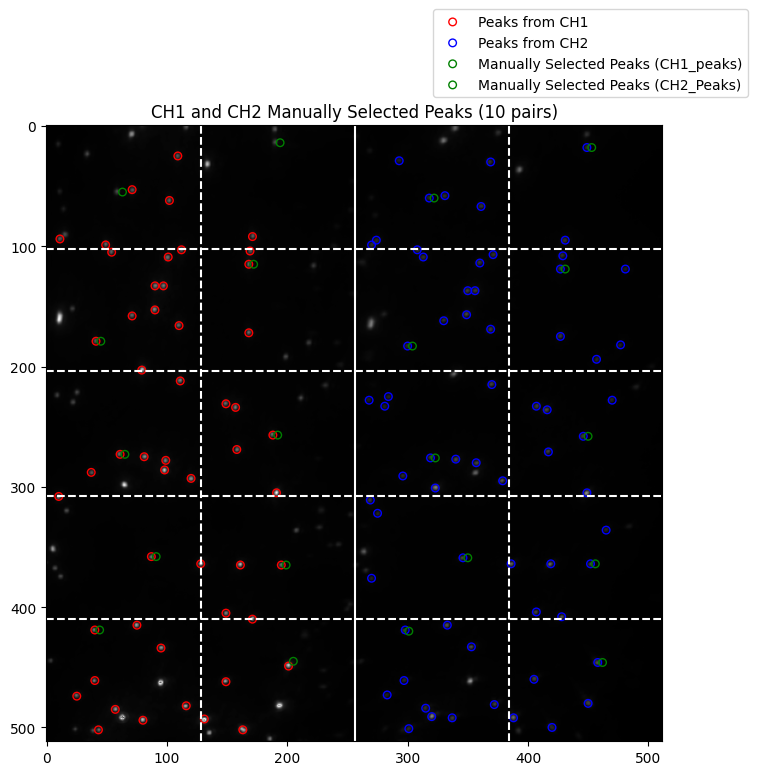

In [20]:
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (10 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')

plt.axvline(x= 128, color='w', linestyle='--')
plt.axvline(x= 384, color='w', linestyle='--')

plt.axvline(x= 256, color='w', linestyle='-')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_10[:, 1], CH1_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH1_peaks)')
plt.scatter(CH2_peaks_10[:, 1], CH2_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks (CH2_Peaks)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [21]:
mapped_peaks_10 = apply_polyfit_params(good_peaks_1, params_x_man_10, params_y_man_10).astype(np.uint16)
poly_pair_count_10, poly_pair_arr_CH1_10, poly_pair_arr_CH2_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1)
poly_pair_count_tol2_10, poly_pair_arr_CH1_tol2_10, poly_pair_arr_CH2_tol2_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=2)
poly_pair_count_tol3_10, poly_pair_arr_CH1_tol3_10, poly_pair_arr_CH2_tol3_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=3)
poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)

print(f"Number of Polynomial pairs (tolerance=1): {poly_pair_count_10}")
print(f"Number of Polynomial pairs (tolerance=2): {poly_pair_count_tol2_10}")
print(f"Number of Polynomial pairs (tolerance=3): {poly_pair_count_tol3_10}")
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_10}")

Number of Polynomial pairs (tolerance=1): 7
Number of Polynomial pairs (tolerance=2): 15
Number of Polynomial pairs (tolerance=3): 37
Number of Polynomial pairs (tolerance=4): 50


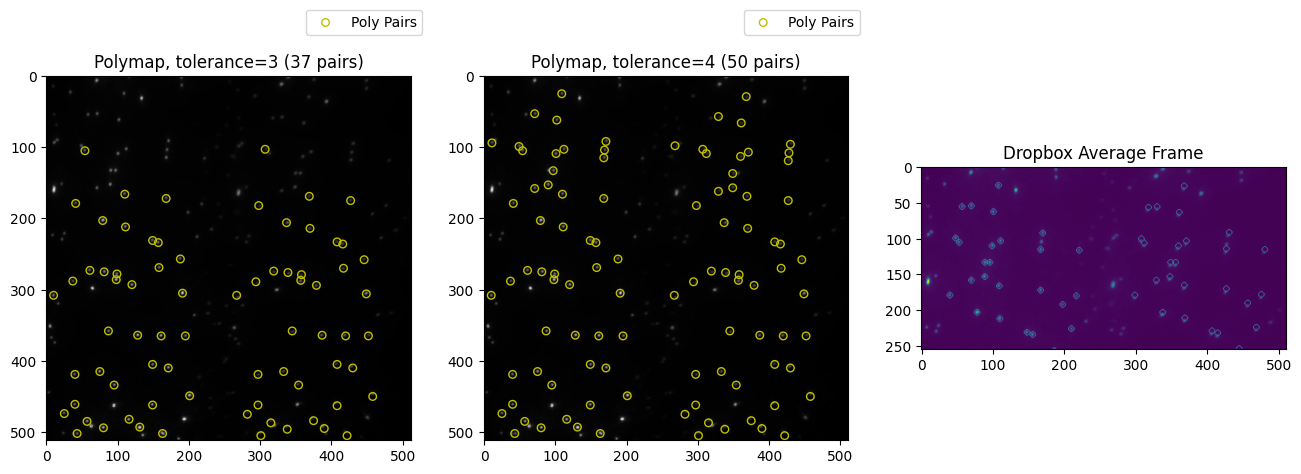

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=3 ({poly_pair_count_tol3_10} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol3_10[:, 1], poly_pair_arr_CH1_tol3_10[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol3_10[:, 1], poly_pair_arr_CH2_tol3_10[:, 0], s=30, facecolors='none', edgecolors='y')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[1].imshow(image, cmap="gray")
axes[1].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_10} pairs)")
# axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[1].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[1].scatter(poly_pair_arr_CH1_tol4_10[:, 1], poly_pair_arr_CH1_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[1].scatter(poly_pair_arr_CH2_tol4_10[:, 1], poly_pair_arr_CH2_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y')
axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[2].imshow(hel1_ave_image)
axes[2].set_title("Dropbox Average Frame")
plt.show()
